In [24]:
from tensorflow.keras.datasets import imdb
(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500)

In [25]:
print(train_input.shape, test_input.shape)

(25000,) (25000,)


In [26]:
print(len(train_input[0]))

218


In [27]:
print(len(train_input[1]))

189


In [28]:
print(train_input[0])

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [29]:
print(train_target[:20])

[1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1]


In [30]:
from sklearn.model_selection import train_test_split
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)

In [31]:
import numpy as np
lengths = np.array([len(x) for x in train_input])

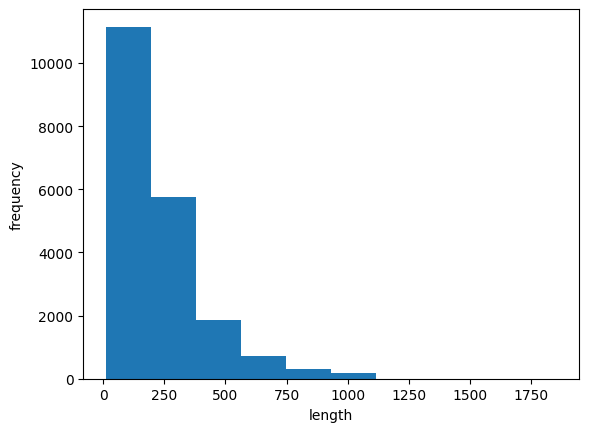

In [32]:
import matplotlib.pyplot as plt
plt.hist(lengths)
plt.xlabel('length')
plt.ylabel('frequency')
plt.show()

In [33]:
# pad_sequences() 함수를 통해 데이터의 길이 맞추기
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen=100)

In [34]:
print(train_seq.shape)

(20000, 100)


In [35]:
print(train_input[0][-10:])

[6, 2, 46, 7, 14, 20, 10, 10, 470, 158]


In [36]:
val_seq = pad_sequences(val_input, maxlen=100)

In [37]:
from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.SimpleRNN(8, input_shape=(100, 500)))
model.add(keras.layers.Dense(1, activation='sigmoid'))
# input_shape를 100, 500으로 둔 것은 샘플의 길이를 100으로 설정했기 때문
# imdb.load_data() 함수에서 500개의 단어만 사용하도록 지정했기 때문에 100, 500

In [38]:
train_oh = keras.utils.to_categorical(train_seq)
# 원 핫 인코딩

In [39]:
print(train_oh.shape)

(20000, 100, 500)


In [40]:
print(train_oh[0][0][:12])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [41]:
print(np.sum(train_oh[0][0]))

1.0


In [42]:
val_oh = keras.utils.to_categorical(val_seq)

In [43]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 8)                 4072      
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 4081 (15.94 KB)
Trainable params: 4081 (15.94 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [44]:
from tensorflow.python.framework.ops import executing_eagerly_outside_functions
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplerann-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
histroy = model.fit(train_oh, train_target, epochs=50, batch_size=64, validation_data=(val_oh, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/50
313/313 [==============================] - 9s 25ms/step - loss: 0.6994 - accuracy: 0.5059 - val_loss: 0.6981 - val_accuracy: 0.5034
Epoch 2/50
  1/313 [..............................] - ETA: 5s - loss: 0.6792 - accuracy: 0.5000

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 7s 22ms/step - loss: 0.6953 - accuracy: 0.5167 - val_loss: 0.6955 - val_accuracy: 0.5074
Epoch 3/50
313/313 [==============================] - 7s 21ms/step - loss: 0.6922 - accuracy: 0.5250 - val_loss: 0.6935 - val_accuracy: 0.5170
Epoch 4/50
313/313 [==============================] - 7s 22ms/step - loss: 0.6895 - accuracy: 0.5332 - val_loss: 0.6917 - val_accuracy: 0.5230
Epoch 5/50
313/313 [==============================] - 7s 22ms/step - loss: 0.6871 - accuracy: 0.5437 - val_loss: 0.6900 - val_accuracy: 0.5316
Epoch 6/50
313/313 [==============================] - 7s 21ms/step - loss: 0.6847 - accuracy: 0.5523 - val_loss: 0.6883 - val_accuracy: 0.5362
Epoch 7/50
313/313 [==============================] - 7s 22ms/step - loss: 0.6824 - accuracy: 0.5622 - val_loss: 0.6868 - val_accuracy: 0.5412
Epoch 8/50
313/313 [==============================] - 7s 22ms/step - loss: 0.6800 - accuracy: 0.5717 - val_loss: 0.6851 - val_accuracy: 0.5464
Epoch 9/50

In [46]:
model.histroy

AttributeError: 'Sequential' object has no attribute 'histroy'